Use this notebook to explore the results of a single city.

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pickle
import pandas as pd
import geopandas as gpd
import networkx as nx
import shapely
import dask
from matplotlib import pyplot as plt
import matplotlib as mpl
from collections import Counter

In [2]:
city = "Turin"
country = "Italy"
with open(f"../data/cities_graph_results_newshapely/{city}_graph_res.gpickle", 'rb') as f:
    G = pickle.load(f)
u, v, data = zip(*G.edges(data=True))
gdf_edges = gpd.GeoDataFrame(data)
gdf_edges.set_geometry("geometry")
gdf_edges.crs = G.graph['crs']
gdf_edges['status'] = pd.Categorical(gdf_edges['status'], ['isolated', 'alongside', 'inbetween', 'surrounded', 'inside'])
gdf_edges['coverage'] = pd.Categorical(gdf_edges['coverage'], ['none', 'partial', 'full'])
ground_nat = gpd.read_file(f"../data/cities_nature_filtered_poly/{city}_ground.geojson")
ground_nat = ground_nat.to_crs(crs=G.graph['crs'])
cover_nat = gpd.read_file(f"../data/cities_nature_filtered_poly/{city}_cover.geojson")
cover_nat = cover_nat.to_crs(crs=G.graph['crs'])

In [3]:
c_ground = Counter(gdf_edges['status'])
print(f"""
    {round(100*c_ground['isolated']/len(gdf_edges), 2)}% are isolated,
    {round(100*c_ground['alongside']/len(gdf_edges), 2)}% alongside,
    {round(100*c_ground['surrounded']/len(gdf_edges), 2)}% surrounded,
    {round(100*c_ground['inbetween']/len(gdf_edges), 2)}% inbetween
    and {round(100*c_ground['inside']/len(gdf_edges), 2)}% inside.
    """)

c_cover = Counter(gdf_edges['coverage'])
print(f"""
    {round(100*c_cover['none']/len(gdf_edges), 2)}% are not covered,
    {round(100*c_cover['partial']/len(gdf_edges), 2)}% are partially covered,
    {round(100*c_cover['full']/len(gdf_edges), 2)}% are fully covered.
    """)

c_bike = Counter(gdf_edges['bikeability_level'])
print(f"""
    {round(100*c_bike[1]/len(gdf_edges), 2)}% are at level 1,
    {round(100*c_bike[2]/len(gdf_edges), 2)}% level 2,
    {round(100*c_bike[3]/len(gdf_edges), 2)}% level 3,
    {round(100*c_bike[4]/len(gdf_edges), 2)}% level 4
    and {round(100*c_bike[5]/len(gdf_edges), 2)}% level 5.
    """)


    62.67% are isolated,
    17.36% alongside,
    3.92% surrounded,
    1.95% inbetween
    and 14.1% inside.
    

    68.14% are not covered,
    5.46% are partially covered,
    26.4% are fully covered.
    

    9.41% are at level 1,
    4.72% level 2,
    35.48% level 3,
    35.53% level 4
    and 14.87% level 5.
    


Text(0.5, 1.0, 'Relationship to cover nature')

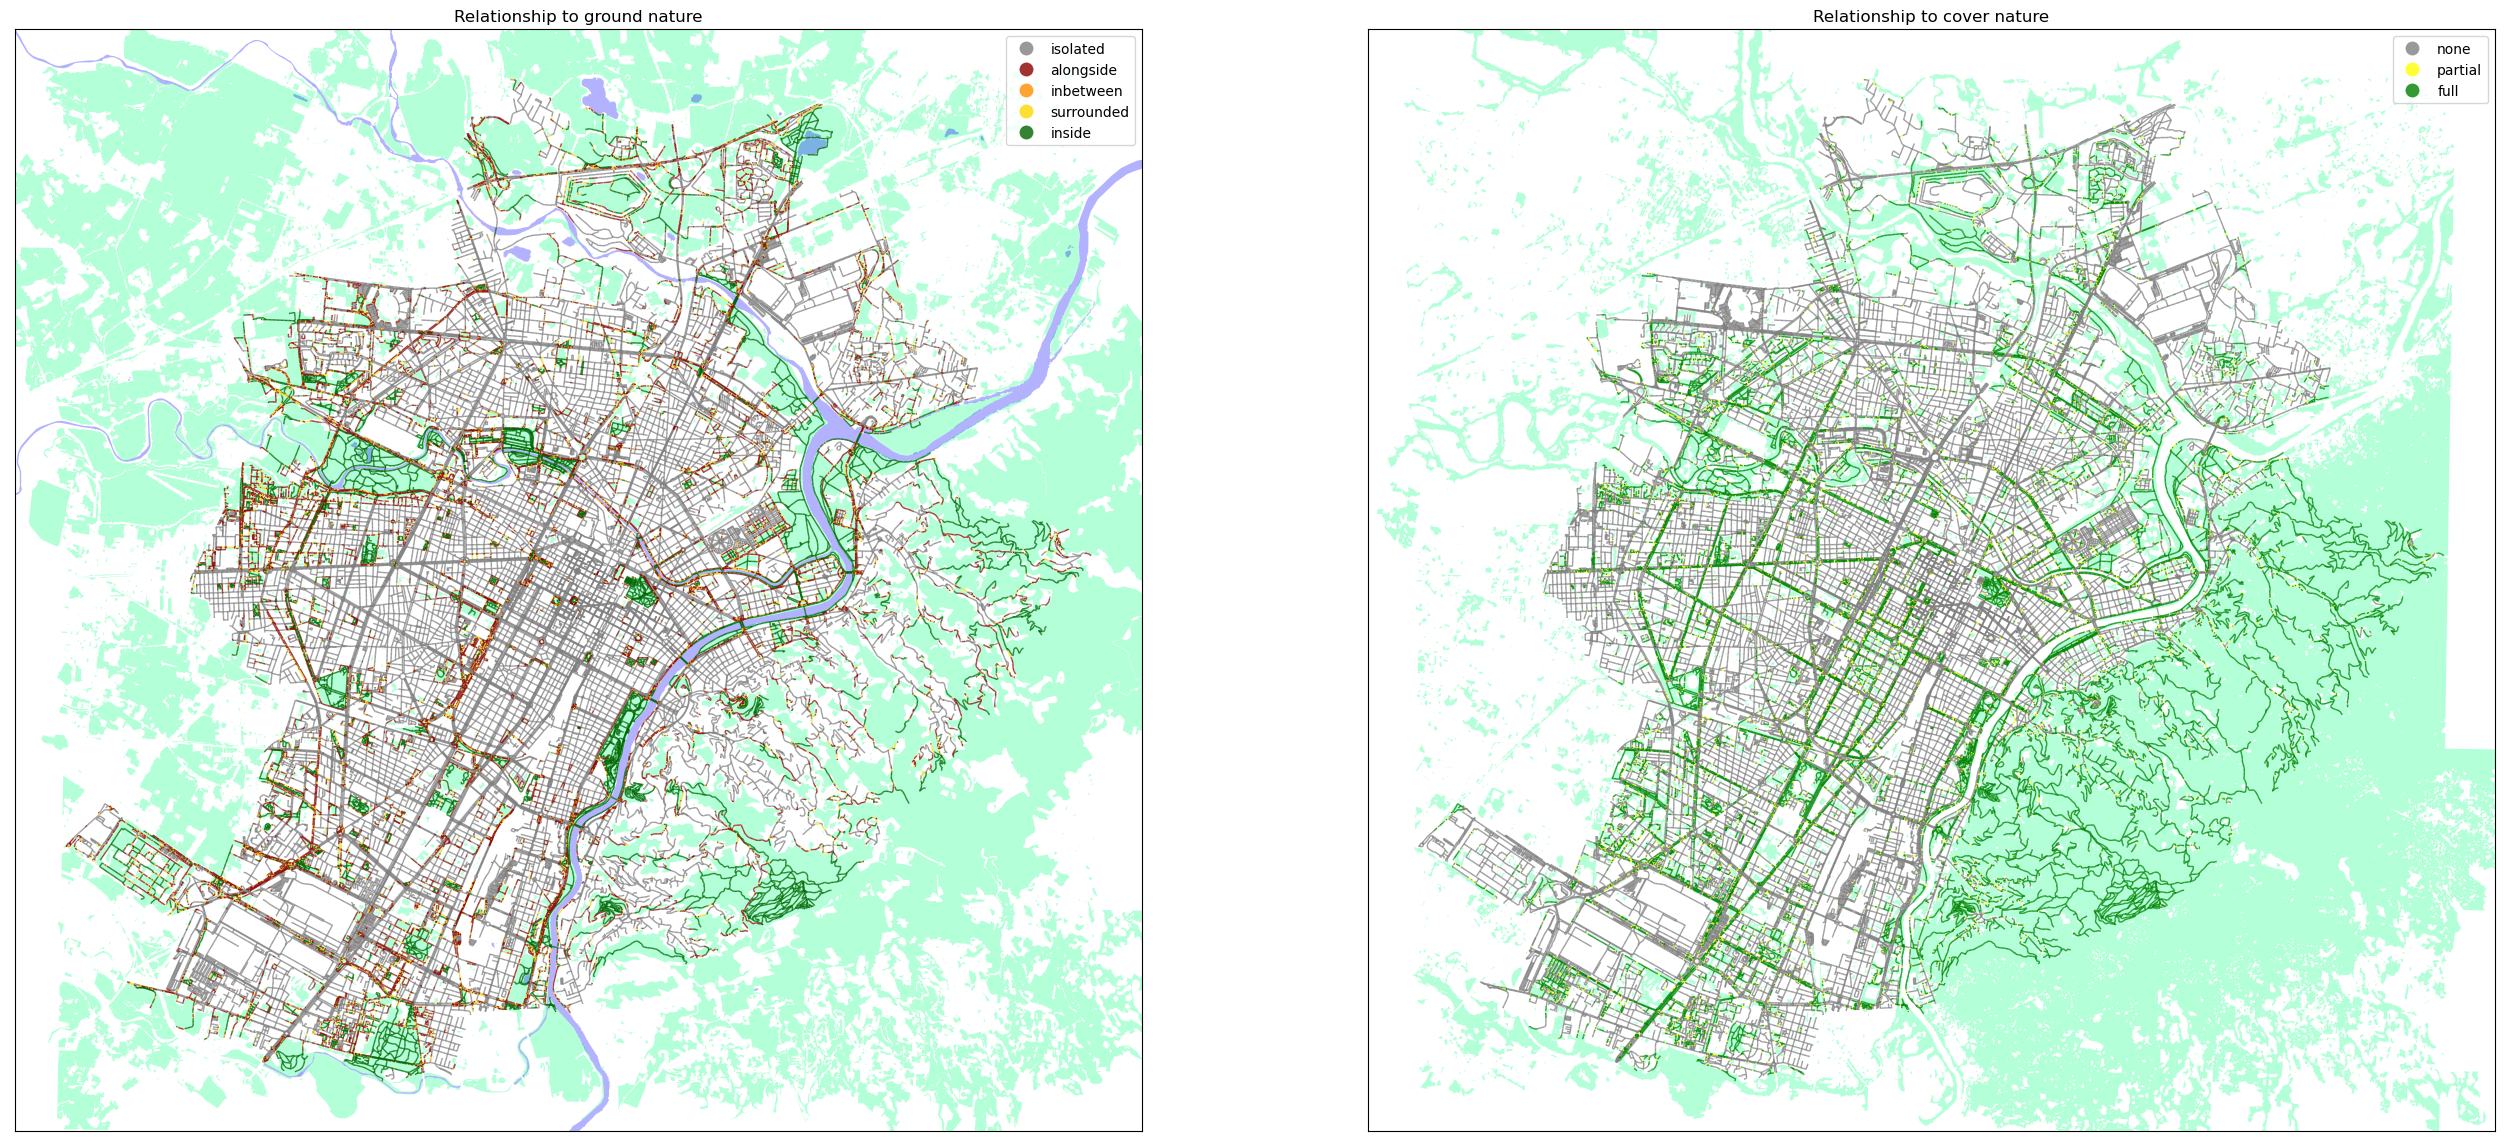

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(32, 18))

ax = axs[0]
custom_cmap = mpl.colors.ListedColormap(["gray", "darkred", "darkorange", "gold", "darkgreen"])
gdf_edges.plot(column='status', alpha=0.8, linewidth=1, ax=ax, cmap=custom_cmap, legend=True)
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ground_nat.plot(column='type', alpha=0.3, ax=ax, cmap='winter')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Relationship to ground nature")

ax = axs[1]
custom_cmap = mpl.colors.ListedColormap(["grey", "yellow", "green"])
gdf_edges.plot(column='coverage', alpha=0.8, linewidth=1, ax=ax, cmap=custom_cmap, legend=True)
ylim = ax.get_ylim()
xlim = ax.get_xlim()
cover_nat.plot(column='type', alpha=0.3, ax=ax, cmap='winter_r')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Relationship to cover nature")

Text(0.5, 1.0, 'Bikeability level')

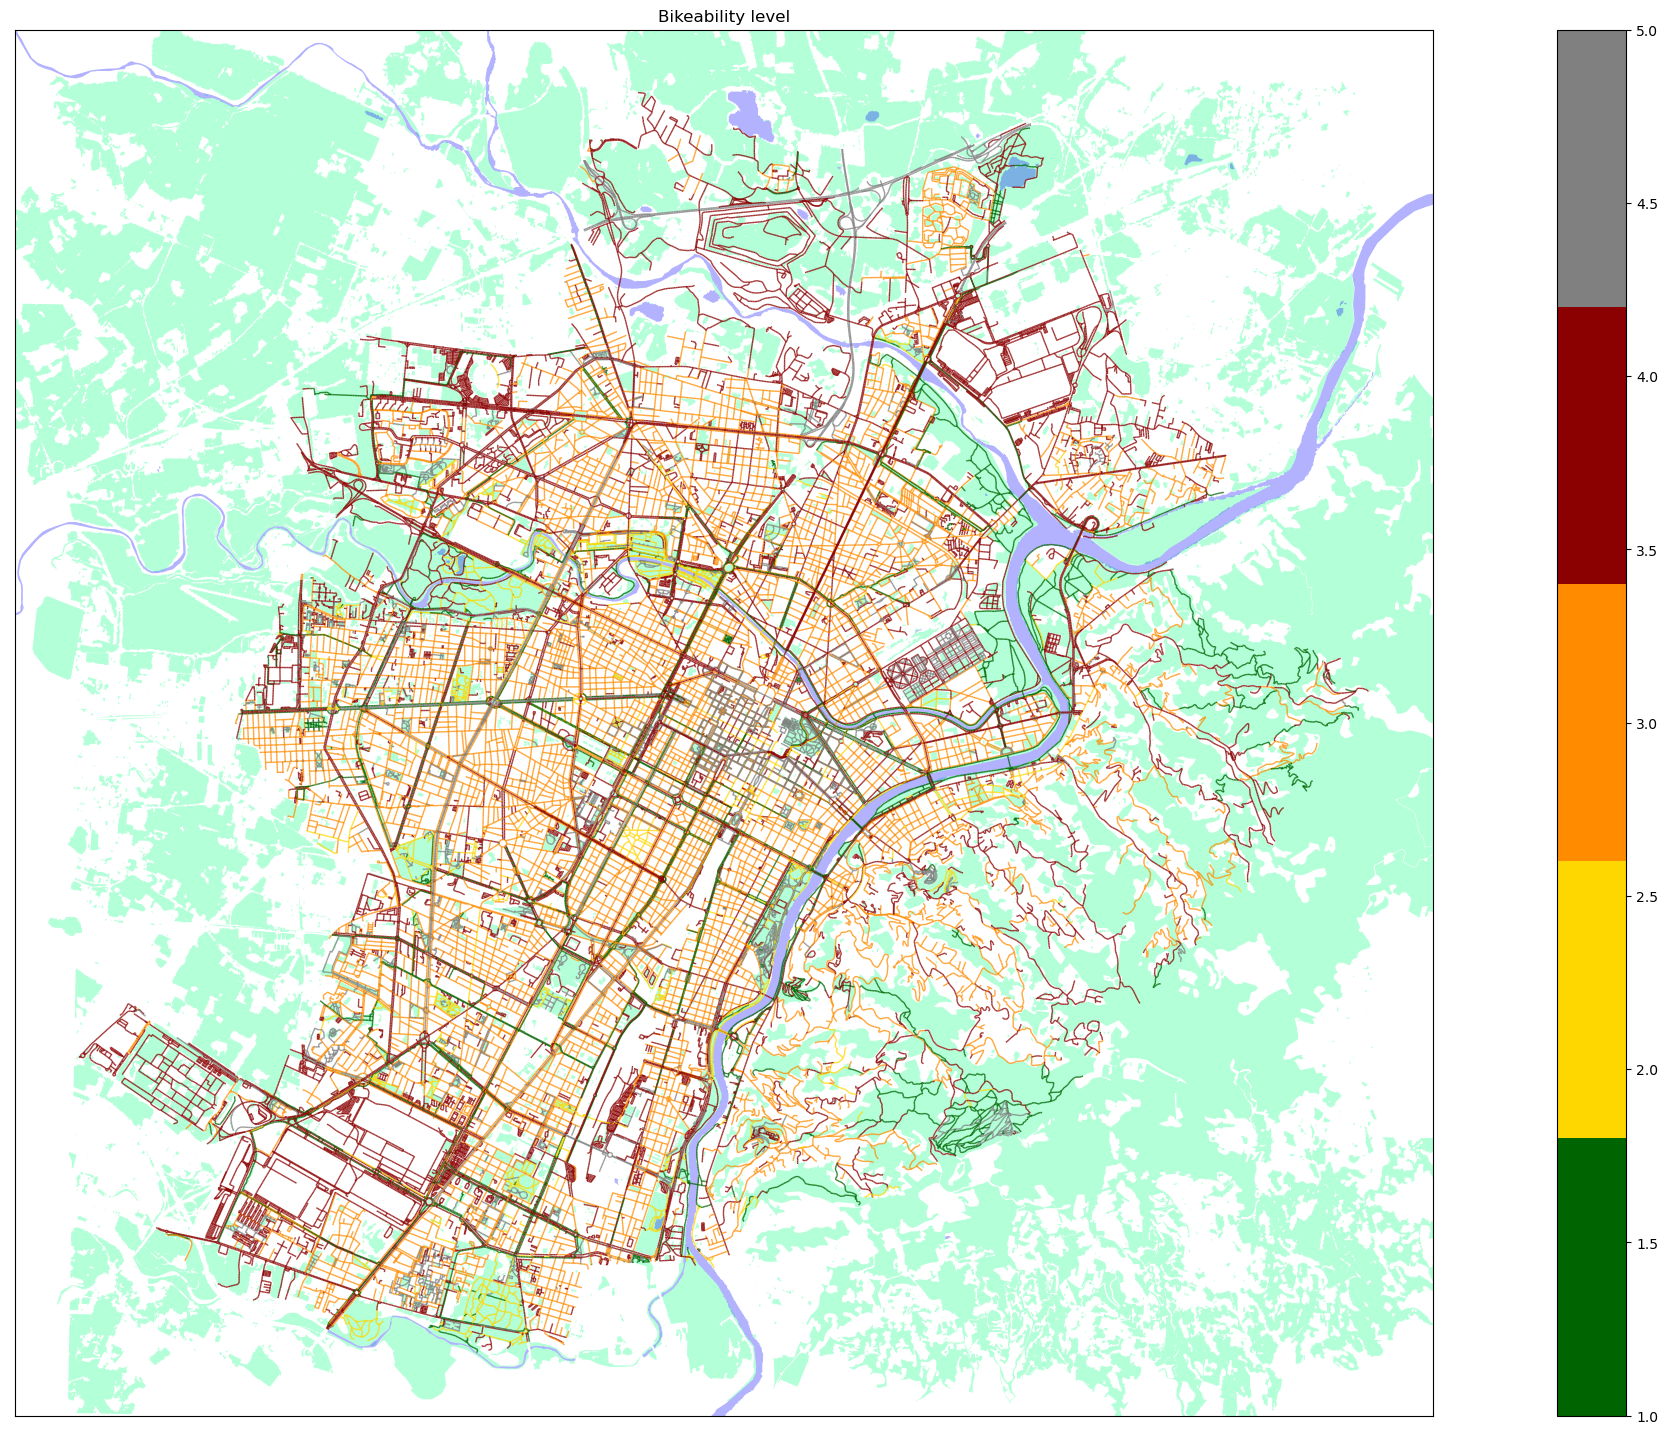

In [5]:
fig, ax = plt.subplots(figsize=(32, 18))
custom_cmap = mpl.colors.ListedColormap(["darkgreen", "gold", "darkorange", "darkred", "gray"])
gdf_edges.plot(column='bikeability_level', alpha=0.8, linewidth=1, ax=ax, cmap=custom_cmap, legend=True)
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ground_nat.plot(column='type', alpha=0.3, ax=ax, cmap='winter')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Bikeability level")